In [7]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/gdrive')
root = '/gdrive/MyDrive/داده کاوی/'


Mounted at /gdrive


In [8]:
df = pd.read_csv(root + "immo_data.csv",parse_dates=['date'])
df.head(3)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19


In [9]:
df.shape

(268850, 49)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [11]:
df.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

In [12]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [13]:
df.nunique()

regio1                          16
serviceCharge                12266
heatingType                     13
telekomTvOffer                   3
telekomHybridUploadSpeed         1
newlyConst                       2
balcony                          2
picturecount                    95
pricetrend                    1234
telekomUploadSpeed               7
totalRent                    28486
yearConstructed                465
scoutId                     268850
noParkSpaces                    71
firingTypes                    132
hasKitchen                       2
geo_bln                         16
cellar                           2
yearConstructedRange             9
baseRent                     26659
houseNumber                   5510
livingSpace                  13005
geo_krs                        419
condition                       10
interiorQual                     4
petsAllowed                      3
street                       52373
streetPlain                  54490
lift                

In [14]:
df['petsAllowed'].value_counts()

negotiable    91970
no            51991
yes           10316
Name: petsAllowed, dtype: int64

In [15]:
df['interiorQual'].value_counts()

normal           81826
sophisticated    64762
luxury            7648
simple            1949
Name: interiorQual, dtype: int64

In [16]:
df['electricityKwhPrice'].value_counts()

0.1985    14639
0.2055    13076
0.1915    10114
0.1845     2952
0.2276     1411
0.2125      727
0.2074      705
0.1775      676
0.2205      662
0.2137      450
0.2132      404
0.2144      358
0.1705      240
0.2195      239
0.2265      193
Name: electricityKwhPrice, dtype: int64

In [17]:
df['energyEfficiencyClass'].value_counts()

C                 14613
NO_INFORMATION    14130
D                 13925
B                 11333
E                  7987
A                  4988
F                  4484
A_PLUS             3618
G                  1806
H                   903
Name: energyEfficiencyClass, dtype: int64

In [18]:
df['noParkSpaces'].value_counts()

1.0       78814
2.0        8955
0.0        3855
3.0         417
4.0         137
          ...  
37.0          1
73.0          1
310.0         1
2241.0        1
58.0          1
Name: noParkSpaces, Length: 71, dtype: int64

In [19]:
df['heatingCosts'].value_counts()

60.00     5310
70.00     4811
80.00     4763
50.00     4286
100.00    3970
          ... 
45.80        1
38.80        1
87.83        1
52.10        1
112.13       1
Name: heatingCosts, Length: 5669, dtype: int64

In [20]:
df['lastRefurbish'].value_counts()

2019.0    20202
2018.0    13206
2017.0     7111
2016.0     5679
2015.0     4638
          ...  
1905.0        1
1964.0        1
1867.0        1
1973.0        1
1918.0        1
Name: lastRefurbish, Length: 88, dtype: int64

In [21]:
df['electricityBasePrice'].value_counts()       

90.76    42856
71.43     3990
Name: electricityBasePrice, dtype: int64

In [22]:
df['electricityBasePrice'].mode()

0    90.76
dtype: float64

In [23]:
df['electricityKwhPrice'].value_counts()             

0.1985    14639
0.2055    13076
0.1915    10114
0.1845     2952
0.2276     1411
0.2125      727
0.2074      705
0.1775      676
0.2205      662
0.2137      450
0.2132      404
0.2144      358
0.1705      240
0.2195      239
0.2265      193
Name: electricityKwhPrice, dtype: int64

In [24]:
df['balcony'].value_counts()

True     165734
False    103116
Name: balcony, dtype: int64

In [25]:
df['telekomHybridUploadSpeed'].value_counts()

10.0    45020
Name: telekomHybridUploadSpeed, dtype: int64

In [26]:
df.drop(columns='telekomHybridUploadSpeed',inplace=True)

In [27]:
df['telekomUploadSpeed'].value_counts()

40.0     158296
2.4       42858
10.0      32889
5.0        1036
1.0         209
100.0       141
4.0          63
Name: telekomUploadSpeed, dtype: int64

In [28]:
others = list(df['telekomUploadSpeed'].value_counts().tail(4).index)
def telekomUploadSpeed_new(x):
    if x in others:
        return 'other'
    else:
        return x

df['telekomUploadSpeed_new'] = df['telekomUploadSpeed'].apply(telekomUploadSpeed_new) 
df = df.drop(columns=['telekomUploadSpeed'])
df['telekomUploadSpeed_new'].value_counts()*100 / len(df)

40.0     58.878929
2.4      15.941231
10.0     12.233216
other     0.538962
Name: telekomUploadSpeed_new, dtype: float64

In [29]:
df['date'].value_counts()

Feb20    79276
May19    76047
Oct19    66685
Sep18    46842
Name: date, dtype: int64

In [30]:
df['livingSpaceRange'].value_counts()

3    82458
2    76383
4    42789
1    27057
5    20523
6    12866
7     6774
Name: livingSpaceRange, dtype: int64

In [31]:
df['noRoomsRange'].value_counts()

3    100992
2     98728
1     31218
4     29851
5      8061
Name: noRoomsRange, dtype: int64

In [32]:
df['regio1'].value_counts()

Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

In [33]:
df['regio2'].value_counts()

Leipzig                         13723
Chemnitz                        12575
Berlin                          10406
Dresden                          7522
Magdeburg                        4860
                                ...  
Lichtenfels_Kreis                  31
Freyung_Grafenau_Kreis             30
Haßberge_Kreis                     24
Neustadt_a.d._Waldnaab_Kreis       16
Kronach_Kreis                      12
Name: regio2, Length: 419, dtype: int64

In [34]:
df['regio3'].value_counts().sum()

268850

In [35]:
df.shape

(268850, 48)

In [36]:
df['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    227632
NONE               4957
ON_DEMAND          3642
Name: telekomTvOffer, dtype: int64

In [37]:
df.isna()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,totalRent,yearConstructed,...,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,telekomUploadSpeed_new
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,True,True,True,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
268846,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,False,True
268847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,False,False
268848,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True


In [38]:
df.isna().sum()/len(df)

regio1                    0.000000
serviceCharge             0.025698
heatingType               0.166844
telekomTvOffer            0.121328
newlyConst                0.000000
balcony                   0.000000
picturecount              0.000000
pricetrend                0.006814
totalRent                 0.150705
yearConstructed           0.212182
scoutId                   0.000000
noParkSpaces              0.653889
firingTypes               0.211880
hasKitchen                0.000000
geo_bln                   0.000000
cellar                    0.000000
yearConstructedRange      0.212182
baseRent                  0.000000
houseNumber               0.264155
livingSpace               0.000000
geo_krs                   0.000000
condition                 0.254748
interiorQual              0.419063
petsAllowed               0.426160
street                    0.000000
streetPlain               0.264136
lift                      0.000000
baseRentRange             0.000000
typeOfFlat          

In [39]:
df.columns[df.isna().sum()/len(df)> 0.50]

Index(['noParkSpaces', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice'],
      dtype='object')

In [40]:
df['totalRent'].fillna(df['totalRent'].mean(),inplace=True)

In [41]:
df['totalRent'].isna().sum()/len(df)

0.0

In [42]:
df['noParkSpaces'].fillna(df['noParkSpaces'].mode(),inplace=True)

In [43]:
df['noParkSpaces'].isna().sum()/len(df)

0.6538887855681607

In [44]:
df['electricityBasePrice'].fillna(df['electricityBasePrice'].mode(),inplace=True)

In [45]:
df['electricityBasePrice'].isna().sum()/len(df)

0.8257504184489493

In [46]:
df['heatingType'].fillna("central_heating",inplace=True)
df['heatingCosts'].isna().sum()/len(df)

0.681911846754696

In [47]:
df.columns[df.isna().sum()/len(df)> 0.50]

Index(['noParkSpaces', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice'],
      dtype='object')

In [48]:
df['lastRefurbish'].fillna(df['lastRefurbish'].min(),inplace=True)
df['lastRefurbish'].isna().sum()/len(df)

0.0

In [49]:
df['energyEfficiencyClass'].mode()

0    C
dtype: object

In [50]:
df['energyEfficiencyClass'].fillna('c',inplace=True)
df['energyEfficiencyClass'].isna().sum()/len(df)

0.0

In [51]:
df['electricityKwhPrice'].fillna(df['electricityKwhPrice'].mean(),inplace=True)
df['electricityKwhPrice'].isna().sum()/len(df)

0.0

In [52]:
df['interiorQual'].mode()

0    normal
dtype: object

In [53]:
df['interiorQual'].fillna('normal',inplace=True)
df['interiorQual'].isna().sum()/len(df)

0.0

In [54]:
df['petsAllowed'].mode()

0    negotiable
dtype: object

In [55]:
df['petsAllowed'].fillna('negotiable',inplace=True)
df['petsAllowed'].isna().sum()/len(df)

0.0

In [56]:
df.columns[df.isna().sum()/len(df)> 0.50]

Index(['noParkSpaces', 'heatingCosts', 'electricityBasePrice'], dtype='object')

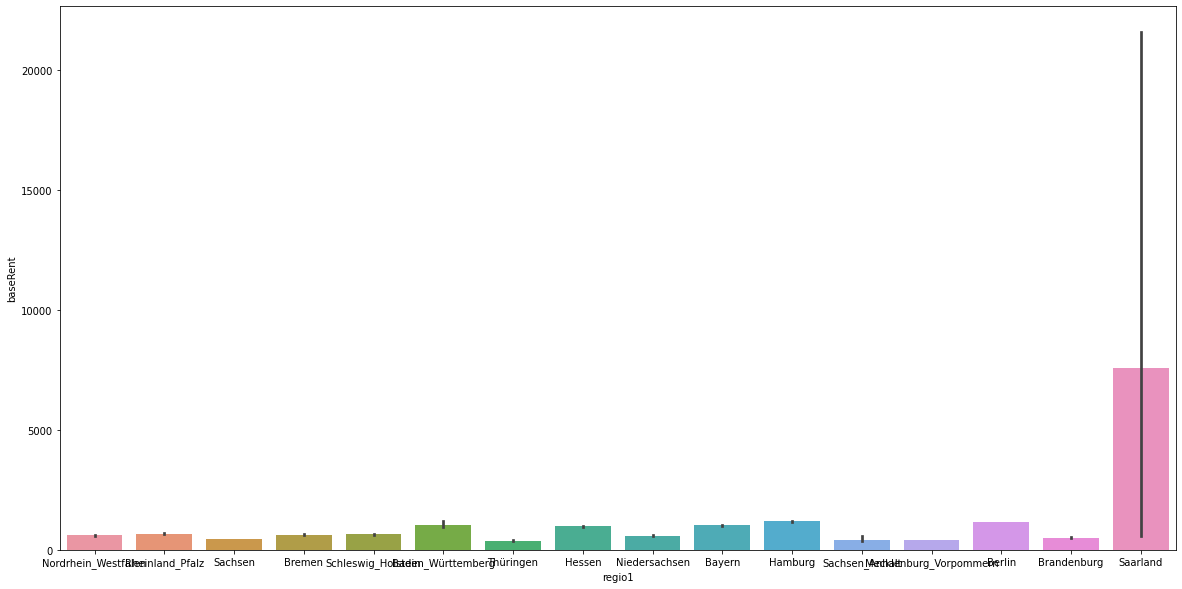

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

sns.barplot(x=df.regio1, y=df.baseRent)
plt.show()

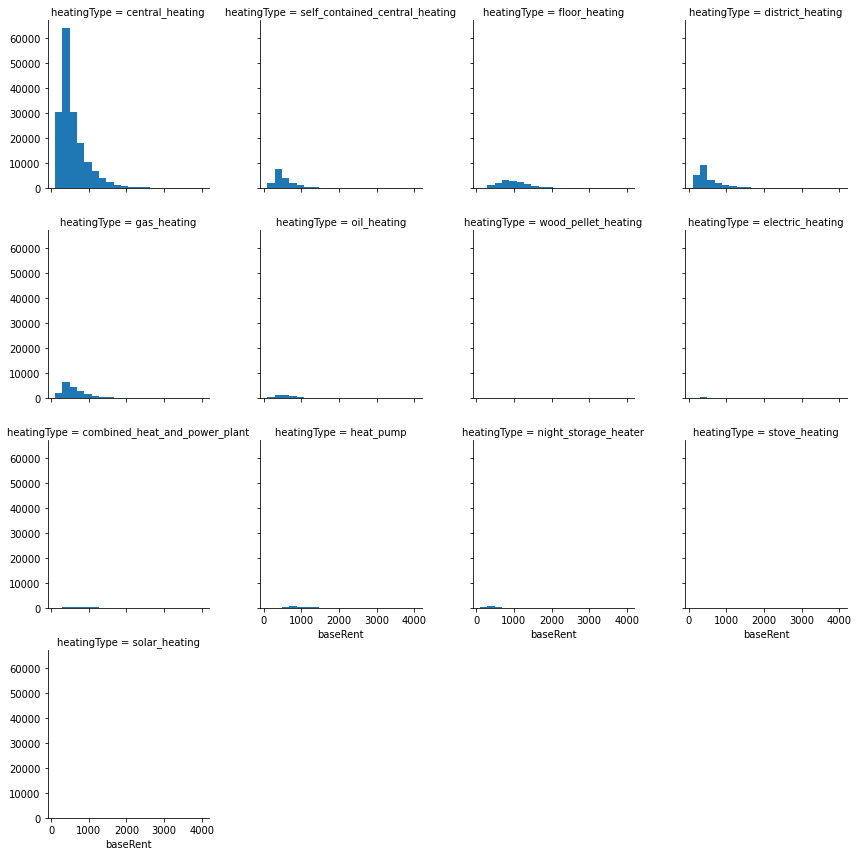

In [58]:
g = sns.FacetGrid(df, col='heatingType', col_wrap=4)
g = g.map(plt.hist, 'baseRent', bins=20, range=(100,4000))

In [59]:
df = df[df.baseRent.between(50,10000, inclusive=True)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.


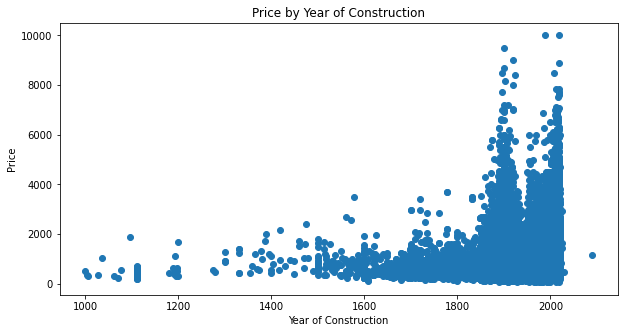

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x='yearConstructed', y='baseRent', data=df)
plt.title('Price by Year of Construction')
plt.xlabel('Year of Construction')
plt.ylabel('Price')
plt.show()

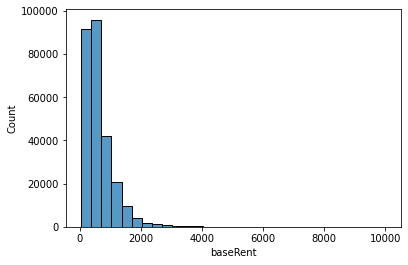

In [61]:
sns.histplot(data = df, x="baseRent",bins=30)

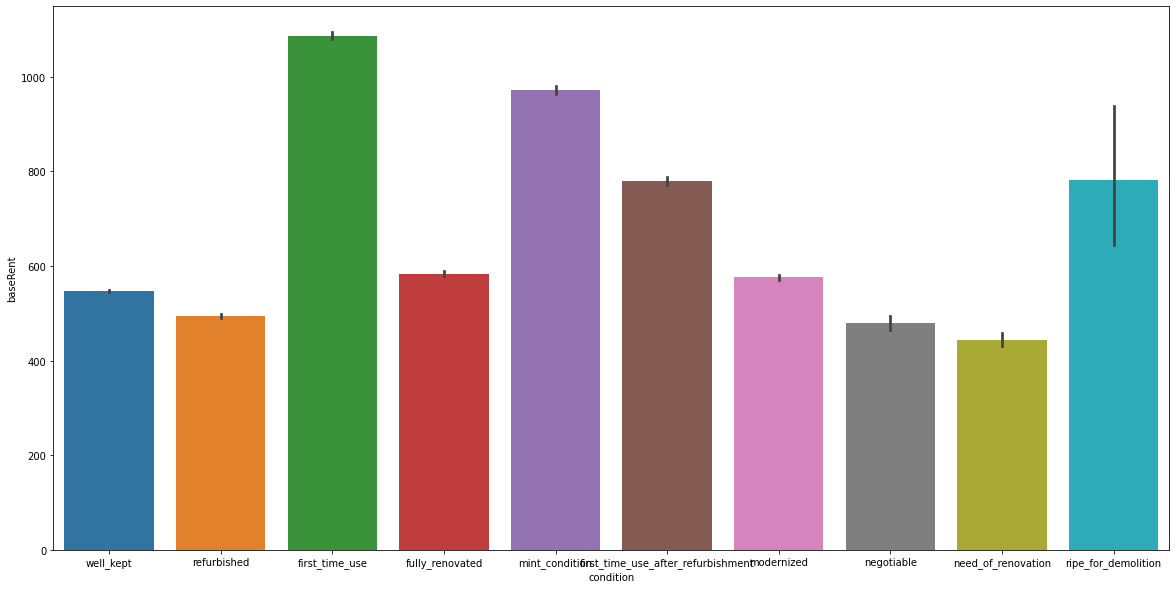

In [62]:
plt.figure(figsize=(20,10))

sns.barplot(x=df.condition, y=df.baseRent)
plt.show()

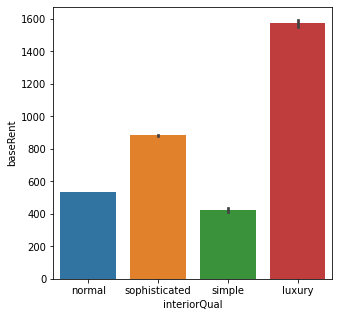

In [63]:
plt.figure(figsize=(5,5))

sns.barplot(x=df.interiorQual, y=df.baseRent)
plt.show()

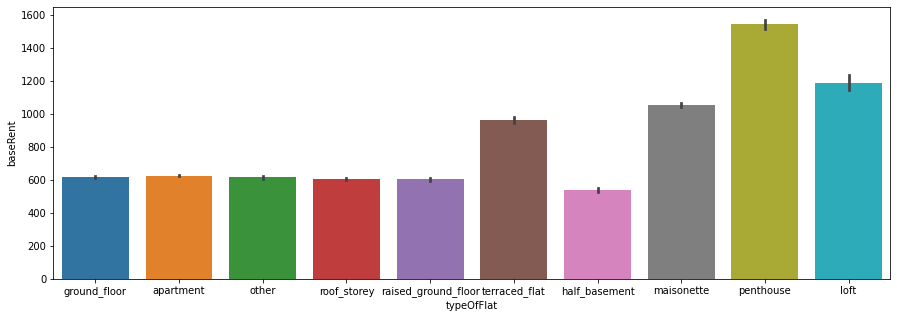

In [64]:
plt.figure(figsize=(15,5))

sns.barplot(x=df.typeOfFlat, y=df.baseRent)
plt.show()

In [65]:
df = df[df.noRooms.between(0,15, inclusive=True)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.


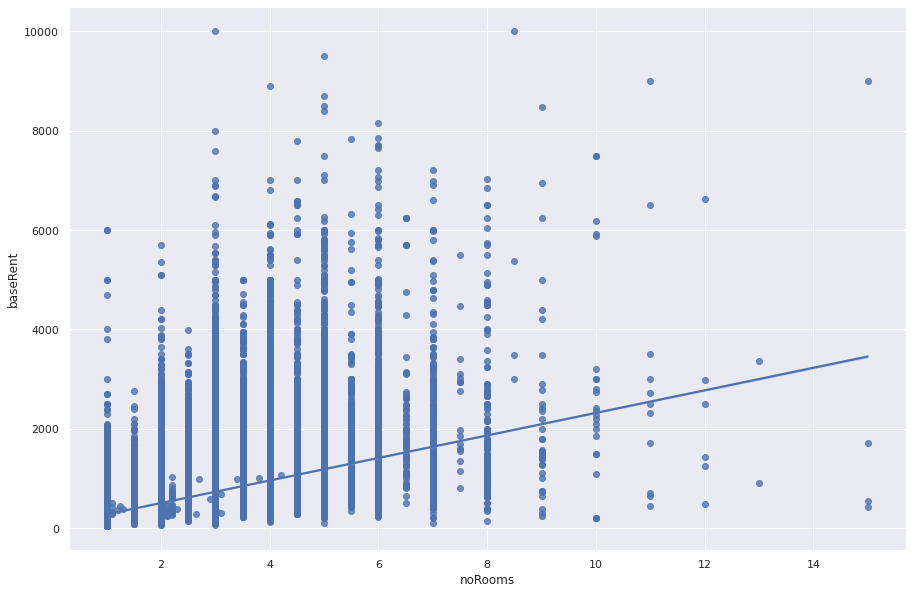

In [66]:
sns.set(rc={'figure.figsize':(15,10)})
sns.regplot(x='noRooms', y='baseRent', data=df)


In [67]:
for columns in df.columns:
  if df[columns].dtypes == 'int64' or df[columns].dtypes == 'float64' :
      df[columns]=((df[columns]-df[columns].mean())/(df[columns].std()))

In [68]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,totalRent,yearConstructed,...,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,telekomUploadSpeed_new
0,Nordrhein_Westfalen,0.309343,central_heating,ONE_YEAR_FREE,False,False,-0.591858,0.626588,-0.001712,-0.029691,...,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,c,-0.654994,0.305116,-0.000048,May19,10.0
1,Rheinland_Pfalz,-0.055935,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279678,0.041265,0.000299,-2.029949,...,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,c,1.537593,NaN,-0.000048,May19,10.0
2,Sachsen,0.342251,floor_heating,ONE_YEAR_FREE,True,True,-0.279678,-0.340466,0.013375,1.119394,...,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,c,-0.654994,NaN,-0.000048,Oct19,2.4
3,Sachsen,-0.305542,district_heating,ONE_YEAR_FREE,False,True,-0.123587,-0.946147,0.000299,-0.050970,...,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,0.06945,c,-0.654994,NaN,-0.000048,May19,40.0
4,Bremen,-0.042772,self_contained_central_heating,NaN,False,True,1.437318,-0.472800,0.000354,-0.348881,...,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,c,-0.654994,NaN,-0.000048,Feb20,NaN


In [69]:
for columns in df.columns:
    if df[columns].dtypes == 'int64' or df[columns].dtypes == 'float64' :
       upper_range = df[columns].mean() + 3 * df[columns].std()
       lower_range = df[columns].mean() - 3 * df[columns].std()

       out_1 = df[(df[columns]> upper_range)|(df[columns]<lower_range)].index
       df = df.drop(out_1)


In [70]:
df.shape

(235155, 48)

In [71]:
y = df['totalRent']
x = df.drop(columns = ['totalRent'])
print(x.shape)
print(y.shape)

(235155, 47)
(235155,)


In [72]:
#from sklearn.decomposition import PCA
#pca = PCA(0.90)
#x_pca = pca.fit_transform(x)

In [73]:
df.drop(['baseRentRange','yearConstructedRange','houseNumber','noRoomsRange','livingSpaceRange','street','streetPlain','firingTypes','telekomTvOffer','petsAllowed','description','facilities','energyEfficiencyClass','date',
 'telekomUploadSpeed_new'
          ,'thermalChar','geo_bln','regio2','regio3'],axis=1,inplace = True)

In [74]:
df.drop(['geo_krs'],axis=1,inplace = True)

In [75]:
df.drop(['picturecount','scoutId','pricetrend'],axis=1,inplace = True)

In [76]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'cellar',
       'baseRent', 'livingSpace', 'condition', 'interiorQual', 'lift',
       'typeOfFlat', 'geo_plz', 'noRooms', 'floor', 'numberOfFloors', 'garden',
       'heatingCosts', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [77]:
def function(columns):
    for cols in df.columns:
        if df[cols].dtype == 'object':
           columns.append(cols)
        
           return columns

 ***multiprocess***

In [78]:
import time

In [79]:
s_time=time.time()
print(f'run time : {time.time() - s_time}')

run time : 6.29425048828125e-05


In [80]:
from multiprocessing import Pool, cpu_count
cpu_count()

2

In [81]:
s_time = time.time()
columns=[]
with Pool(cpu_count()) as p:
        res_list = list(p.imap(function, columns))

print(f'run time : {time.time() - s_time}')

run time : 0.16694068908691406


In [83]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object':
        columns.append(cols)
        
columns

['regio1', 'heatingType', 'condition', 'interiorQual', 'typeOfFlat']

In [85]:
dummies_feature = pd.get_dummies(df[columns])
dummies_feature.head()

,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [86]:
df = pd.concat([df, dummies_feature], axis=1)
df.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,hasKitchen,cellar,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,Nordrhein_Westfalen,0.309343,central_heating,False,False,-0.001712,-0.029691,-0.038935,False,True,...,0,1,0,0,0,0,0,0,0,0
1,Rheinland_Pfalz,-0.055935,self_contained_central_heating,False,True,0.000299,-2.029949,0.080712,False,False,...,0,1,0,0,0,0,0,0,0,0
2,Sachsen,0.342251,floor_heating,True,True,0.013375,1.119394,-0.038935,False,True,...,1,0,0,0,0,0,0,0,0,0
3,Sachsen,-0.305542,district_heating,False,True,0.000299,-0.050970,NaN,False,False,...,0,0,0,0,0,1,0,0,0,0
4,Bremen,-0.042772,self_contained_central_heating,False,True,0.000354,-0.348881,NaN,False,False,...,1,0,0,0,0,0,0,0,0,0


In [87]:
df.drop(['regio1','heatingType','condition','interiorQual','typeOfFlat'],axis=1,inplace = True)


In [88]:
df.drop(['newlyConst','balcony','hasKitchen','cellar','lift','garden'],axis=1,inplace = True)


In [89]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'bool':
        columns.append(cols)
        
columns

[]

In [90]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'float64':
        columns.append(cols)
        
columns

['serviceCharge',
 'totalRent',
 'yearConstructed',
 'noParkSpaces',
 'baseRent',
 'livingSpace',
 'geo_plz',
 'noRooms',
 'floor',
 'numberOfFloors',
 'heatingCosts',
 'lastRefurbish',
 'electricityBasePrice',
 'electricityKwhPrice']

***Dask***

In [91]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 837 kB 5.1 MB/s 
     |████████████████████████████████| 136 kB 57.9 MB/s 
     |████████████████████████████████| 830 kB 39.5 MB/s 
     |████████████████████████████████| 822 kB 50.8 MB/s 
     |████████████████████████████████| 802 kB 54.5 MB/s 
     |████████████████████████████████| 802 kB 44.0 MB/s 
     |████████████████████████████████| 793 kB 47.5 MB/s 
     |████████████████████████████████| 793 kB 68.8 MB/s 
     |████████████████████████████████| 791 kB 54.7 MB/s 
     |████████████████████████████████| 786 kB 46.0 MB/s 
     |████████████████████████████████| 779 kB 53.6 MB/s 
     |████████████████████████████████| 778 kB 52.6 MB/s 
     |████████████████████████████████| 776 kB 38.5 MB/s 
     |████████████████████████████████| 769 kB 51.8 MB/s 
     |████████████████████████████████| 766 kB 48.0 MB/s 
     |████████████████████████████████| 1.0 MB 47.0 MB/s 
     |████████████████████████████████| 722 kB 56.7 MB/s 
     |█████████

In [92]:
import dask
import dask.dataframe as dd
ddf = dd.from_pandas(df, npartitions=2)
ddf.partitions[0]

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,geo_plz,noRooms,floor,numberOfFloors,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8
134363,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [93]:
dpdf = ddf.compute()
type(dpdf)

pandas.core.frame.DataFrame

In [94]:
s_time = time.time()
def function(columns):
    for cols in df.columns:
        if df[cols].dtype == 'object':
           columns.append(cols)
        
           return columns
print(f'run time : {time.time() - s_time}')

run time : 0.00015306472778320312


In [95]:
dpdf = ddf.compute()
type(dpdf)

pandas.core.frame.DataFrame

In [96]:
dpdf.head()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,geo_plz,noRooms,floor,numberOfFloors,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0.309343,-0.001712,-0.029691,-0.038935,-0.105143,0.046295,0.251480,1.398744,-0.308770,-0.089742,...,0,1,0,0,0,0,0,0,0,0
1,-0.055935,0.000299,-2.029949,0.080712,0.310855,0.058136,1.085763,0.379574,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,0.342251,0.013375,1.119394,-0.038935,0.645684,0.037612,-1.301675,0.379574,0.241405,0.067076,...,1,0,0,0,0,0,0,0,0,0
3,-0.305542,0.000299,-0.050970,NaN,-0.616517,-0.063628,-0.995807,0.379574,0.241405,NaN,...,0,0,0,0,0,1,0,0,0,0
4,-0.042772,0.000354,-0.348881,NaN,0.239831,0.042230,-0.326150,0.379574,-0.308770,NaN,...,1,0,0,0,0,0,0,0,0,0


***pyspark***

In [97]:
import os, sys
sys.executable

'/usr/bin/python3'

In [98]:
os.environ["PYSPARK_PYTHON"] = sys.executable
!pip install pyspark

In [99]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .getOrCreate()

In [104]:
sdf=spark.createDataFrame(df)


In [ ]:
sdf.show(10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import pickle

prediction = []
def linearregression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    
    #Saving the model
    Pkl_Filename = "LR_Model.pkl"  
    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(linreg, file)
        
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))
    print('R2_score:', metrics.r2_score(ytest, y_pred))
    plt.scatter(y_pred,ytest)
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()
linearregression(X_train, y_train, X_test, y_test)